# Lab 2

Modelling and computation in hazard assessment
26-27 Februrary 2024

In Lab 1, we introduced fundamental data analysis and modelling concepts. In Lab 2 we will demonstrate more advanced modelling techniques that are likely to be seen in practice. Once more, the practical demonstration follows the concepts introduced in the lectures.

- In the first section, we will introduce the concept of k-fold cross-validation.

- Then we'll load the same dataset with in vitro genotoxocity data used in Lab 1 and use cross-validation for estimating the model generalisation error.

- In the next step, we will fine tune the model hyperparameters.

- Finally, we will attempt to develop models for all Ames strains with and without metabolic activation and compare their predictive performances.

Note: This training is using a public computing platform and hence all data are not proprietary, not confidential and not subject to IPR restrictions. Still, the dataset has not been openly shared as this would require the inclusion of the relevant terms and conditions of the applicable licences. Be aware with using confidential data in public computing platforms and do not share this datase further.

## k-Fold cross validation for model evaluation

The name cross validation originates from the crossing over the training and validation stages in successive rounds. The idea is to avoid arbitrarily fixing the part of the dataset used for evaluation. Instead we wish to give each sample in the dataset the opportunity to be used in the validation set (and also for training). How can we do this?

In each round we split the dataset into k parts. k-1 of these parts are merged and used for training and the remaining part is used for validation. This process is repeated k times (image from https://doi.org/10.48550/arXiv.1811.12808). Each of the k trainings is using the same model hyperparameters, e.g. the same number of hidden layers and drop-out rate. After completing the k-folds we have obtained k values of the performance metric of interest, such as the balanced accuracy. The final estimate of the balanced accuracy for unseen data (a metric for the model generalisation) is taken as the arithmetic mean of the performance metric computed for the k evaluation sets.

Please note that k-fold cross validation is not the only methods used for model evaluation. In practice, one may encounter simple normal approximations (we asssume that the prediction correctness is a Bernoulli trial) or repeated hold-out with bootstrapping using various corrections.

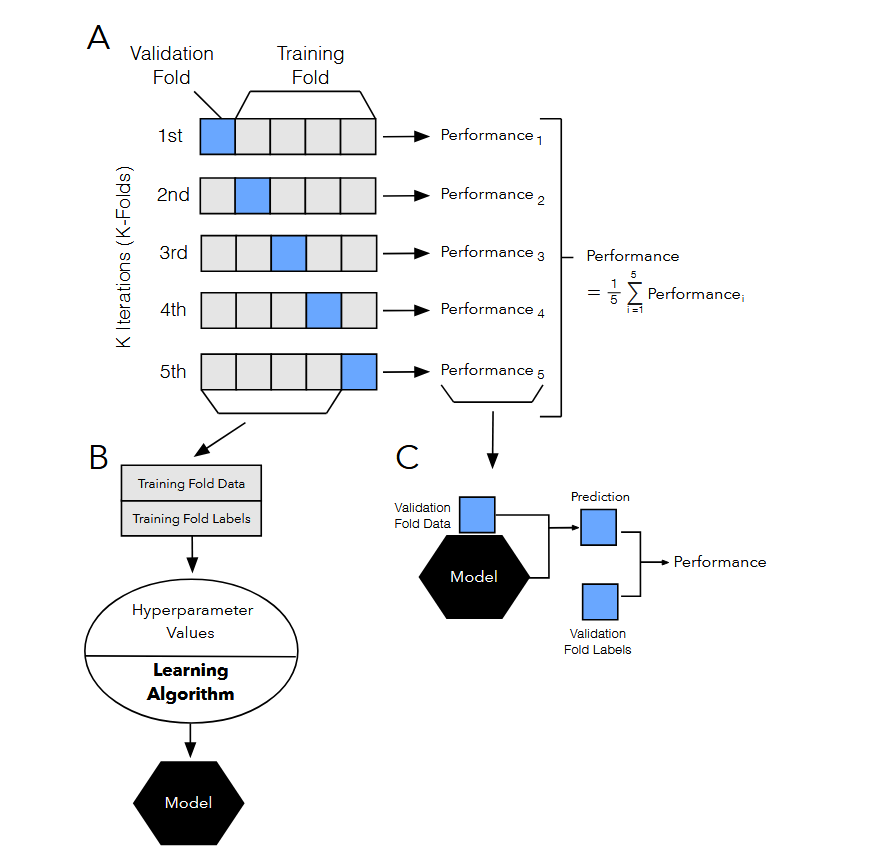

The remaining of this section uses k-fold cross validation for estimating the generalisation predictive performance of our neural network model using the same arbitrary model hyperparameters as in Lab 1. The next section moves a step further and attempts to increase the predictive performance by altering the model hyperparameters and selecting the optimal model within the allowed hyperparameter space.

Cross-validation is used for both of these tasks. It may not be the panacea to all machine learning challenges, but it remains the most commonly used technique for model evaluation and model selection.

### How can we select the number of folds?

So far we set k=5 to illustrate how k-fold cross validation can be used for model evaluation. But why did we use 5 folds? Why not 2 or 10?

It is easy to build some first arguments. If the number of folds is small this means that we leave a large portion of the data for validation. This means that the obtained performance metrics may be pessimistically biased, assuming that the model has further capacity to improve. On the other hand, if k is too large then the variance of the evaluation metric will increase because we use fewer data points in the validation set. In addition, increasing the number of folds increases the computational cost for two reasons: we carry out more model trainings and each of these trainings takes longer because it uses more data (the validation only uses inference and is much faster than training). As it frequently happens with modelling we need to find the sweet spot. It has been demonstrated that there is no universal unbiased estimate of the variance of k-fold cross validation (https://www.jmlr.org/papers/v5/grandvalet04a.html).

There is a special case, namely k=n, where n is the size of the dataset. This can have practical applications when the dataset is small, but is otherwise very computationally demanding. In addition it has high variance because the n fitted models are highly correlated. More about this in the lectures.

In principle, the k-fold cross validation can be repeated with different random number seeds for splitting the dataset to the training and validation sets. This will give a more robust estimate of the performance metric but with some additional computational cost. Moreover, the validation sets will be overlapping that may have implications on the type of statistical tests for algorithm selection.

## k-Fold cross validation for model selection

Cross-validation for model selection resembles the more typical split of a dataset into test, validation and training subsets. The difference is that we introduce a loop over the folds.

The steps can be summarised as follows. We first set aside a test set that we will not touch during the model development process but keep it only for the final model evaluation.

The second step is the most interesting concept. We will need to try different sets of hyperparameters, such as the number of neural network layers and number of neurons in each layer. For each set of hyperparameters we would like to try we will repeat the k-fold cross validation by using only the training set.

We select the hyperameters that gave the best average validation performance across the folds.  With these hyperparameters we fit a model using the whole training set. This model is used for estimating the generalisation error using the test set. As an option we could also fit the final model to the whole dataset. We are not able to estimate its generalisation error because we ran out of data, but likley it is smaller than the generalisation error we computed in the previous step. This is the model that we use for inference, e.g. for prioritisation or hazard assessment.

The use of k-fold for cross validation is visually explained in the figure below(taken from https://doi.org/10.48550/arXiv.1811.12808).

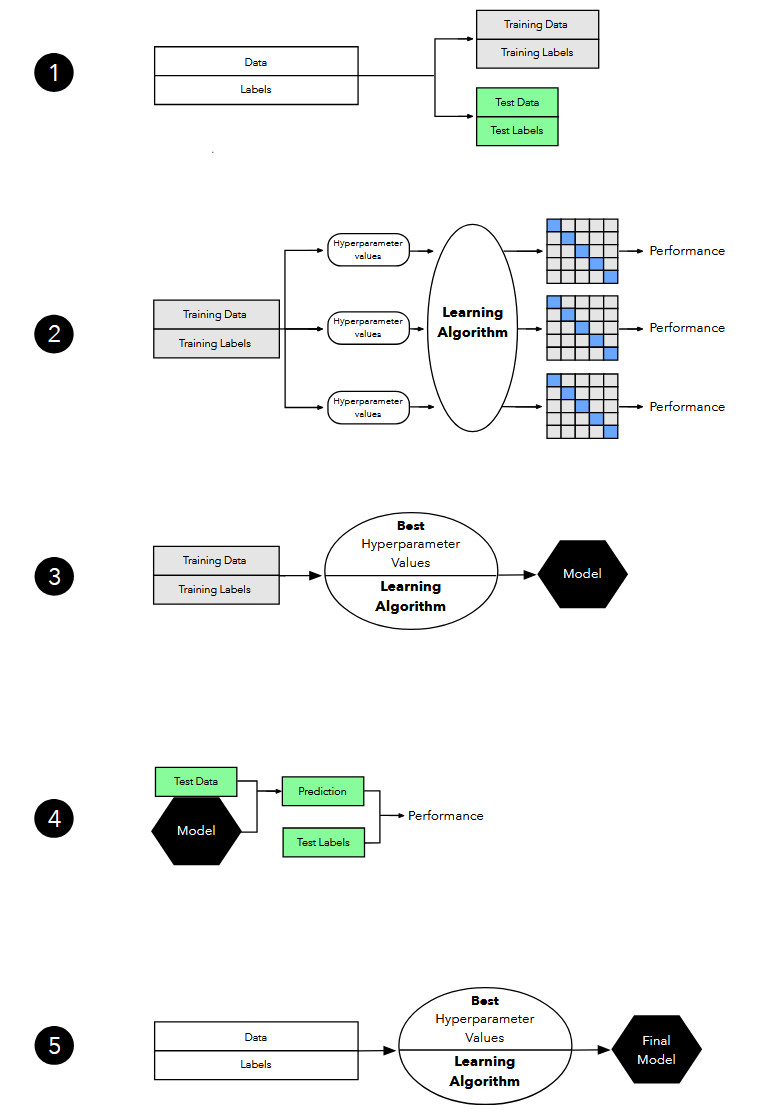

As a final note, when the dataset is very large using k-fold cross validation may be an overkill and a simple test/validation/training split may be sufficient. When the dataset is large high variance is not an issue, .i.e. it does not matter how we split the dataset.

In my opinion, the datasets usually derived from guideline studies, especially in vivo, are typically not large enough and cross-validation is likely the method of choice. However, high throughput methods may provide large datasets and hence a simple test/validation/training split may be sufficient.

## The law of parsimony